<img src="af_1.png" alt="Drawing" align="left" style="width: 500px;"/>
<img src="af_2.png" alt="Drawing" align="left" style="width: 500px;"/>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import string

# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3)

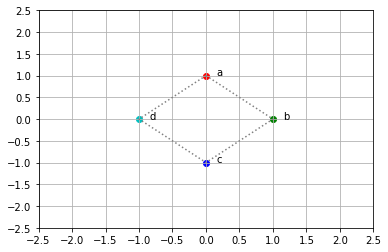

In [7]:
color_lut = 'rgbc'
fig = plt.figure()
ax = plt.gca()
xs = []
ys = []
for row in A:
    output_row = I @ row # Matrix multiplication operator introduced in Python 3.5
    x, y, i = output_row
    xs.append(x)
    ys.append(y)
    i = int(i) # convert float to int for indexing
    c = color_lut[i]
    plt.scatter(x, y, color=c)
    plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
xs.append(xs[0])
ys.append(ys[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

### Scaling transformation matrix

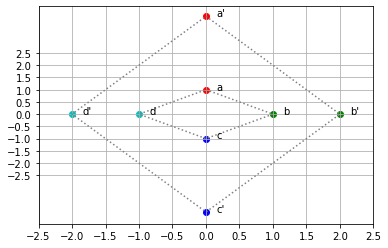

In [19]:
# create the scaling transformation matrix
T_s = np.array([[2, 0, 0], [0, 4, 0], [0, 0, 1]])

fig = plt.figure()
ax = plt.gca()
xs_s = []
ys_s = []
for row in A:
    output_row = T_s @ row
    x, y, i = row
    x_s, y_s, i_s = output_row
    xs_s.append(x_s)
    ys_s.append(y_s)
    i, i_s = int(i), int(i_s) # convert float to int for indexing
    c, c_s = color_lut[i], color_lut[i_s] # these are the same but, its good to be explicit
    plt.scatter(x, y, color=c)
    plt.scatter(x_s, y_s, color=c_s)
    plt.text(x + 0.15, y, f"{string.ascii_letters[int(i)]}")
    plt.text(x_s + 0.15, y_s, f"{string.ascii_letters[int(i_s)]}'")

xs_s.append(xs_s[0])
ys_s.append(ys_s[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_s, ys_s, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

### Rotation transformation matrix

AttributeError: 'Figure' object has no attribute 'grid'

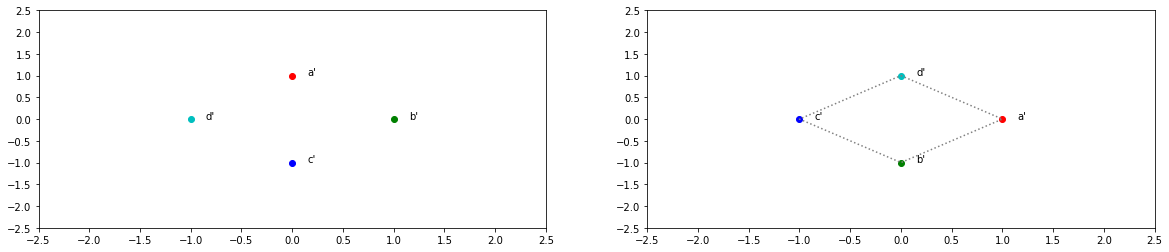

In [39]:
# create the rotation transformation matrix
T_r = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), sharey=False)

for row in A:
    output_row = T_r @ row
    x, y, i = row
    x_r, y_r, i_r = output_row
    i_r = int(i_r) # convert float to int for indexing
    c, c_r = color_lut[i], color_lut[i_r] # these are the same but, its good to be explicit
    letter_r = string.ascii_letters[i_r]
    ax1.scatter(x, y, color=c)
    ax2.scatter(x_r, y_r, color=c_r)
    ax1.text(x + 0.15, y, f"{letter_r}'")
    ax2.text(x_r + 0.15, y_r, f"{letter_r}'")

ax1.plot(x, y, color="gray", linestyle='dotted')
ax2.plot(xs, ys, color="gray", linestyle='dotted')

for ax in (ax1, ax2):
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))

<img src="af_3.png" alt="Drawing" align="left" style="width: 600px;"/>

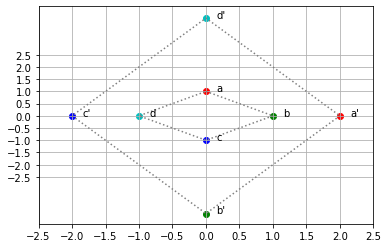

In [37]:
# create combined tranformation matrix
T = T_s @ T_r

fig = plt.figure()
ax = plt.gca()

xs_comb = []
ys_comb = []
for row in A:
    output_row = T @ row
    x, y, i = row
    x_comb, y_comb, i_comb = output_row
    xs_comb.append(x_comb)
    ys_comb.append(y_comb)
    i, i_comb = int(i), int(i_comb) # convert float to int for indexing
    c, c_comb = color_lut[i], color_lut[i_comb] # these are the same but, its good to be explicit
    letter, letter_comb = string.ascii_letters[i], string.ascii_letters[i_comb]
    plt.scatter(x, y, color=c)
    plt.scatter(x_comb, y_comb, color=c_comb)
    plt.text(x + 0.15 , y, f"{letter}")
    plt.text(x_comb + 0.15, y_comb, f"{letter_comb}'")
xs_comb.append(xs_comb[0])
ys_comb.append(ys_comb[0])
plt.plot(xs, ys, color="gray", linestyle='dotted')
plt.plot(xs_comb, ys_comb, color="gray", linestyle='dotted')
ax.set_xticks(np.arange(-2.5, 3, 0.5))
ax.set_yticks(np.arange(-2.5, 3, 0.5))
plt.grid()
plt.show()

## Working with Image

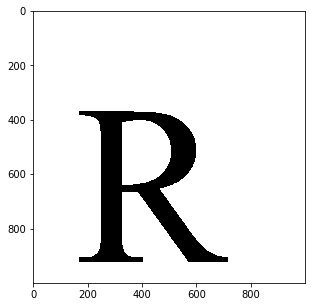

In [44]:
img = plt.imread('R.png')
img.shape #  (1000, 1000, 4)
plt.figure(figsize=(5, 5))
plt.imshow(img)

In [46]:
# 2x scaling requires a tranformation image array 2x the original image
img_transformed = np.empty((2000, 2000, 3), dtype=np.uint8)
for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j, :]
        input_coords = np.array([i, j, 1])
        i_out, j_out, _ = T @ input_coords
        img_transformed[i_out, j_out, :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

IndexError: index -2004 is out of bounds for axis 1 with size 2000